<a href="https://colab.research.google.com/github/hkaragah/google_colab_repo/blob/main/hands_on_ml_exercises/05_LinearSVC_SVC_SGDClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Classification using LinearSVC, SVC, and SGDClassifier

__Disclaimer:__ This exercise is adopted from `"Hands-on Machine Learning with Scikit-Learn, Keras & Tensorflow (Third Edition)"` book written by `_Aurelien Geron_` publoshed by `_O'Reilly_`. I broke them down into smaller digestable snippets, made some modifications, and added some explanations so that I can undersatand them better. The porpuse of this notebook is just for me to understand the concept and have hands-on practice while reading the book material.

## Object
Compare Support Vector Machines (SVM) linear classifiers with SGDClassifier

## Load Data

In this notebook, I'll use the scikit learn __breast cancer dataset__ to compare linear classifiers performance. Let's load the required libraries and also the __breast cancer dataset__.

In [16]:
from sklearn.datasets import load_breast_cancer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from copy import deepcopy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [3]:
bc_data = load_breast_cancer(as_frame=True)
type(bc_data)

sklearn.utils._bunch.Bunch

__Bunch__ is a special datatype contains multiple pandas dataframes. Let's inspect the dataframes inside `iris`.

## Inspect Data

In [3]:
bc_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
# Description of dataset
print(bc_data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

Here, is the first 5 rows of the features. According to the above description, there are 30 features in total.

In [4]:
data = pd.DataFrame()
data = bc_data.data.copy(deep=True)
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

The `data` dataframe contains 30 features as shown in the table above. There are a total of 569 samples with numeric (float64) values and with no _null_ value. Let's check the `target` dataseries.

In [5]:
target = bc_data.target
target.head()

,target
0,0
1,0
2,0
3,0
4,0


In [12]:
target.value_counts()

,count
target,
1,357
0,212


In [13]:
bc_data.target_names

array(['malignant', 'benign'], dtype='<U9')

According to the description, the `bc_data.target` has a total of 569 (357+212) entries. There are two classes in the dataseries (binary), 0 and 1 which are corresponding to 'malignant' and 'benign'.

- 1 -> benign (357)
- 0 -> malignant (212)


In [6]:
# Adding "target" to "data" dtaframe
data['target'] = target

# Compute correlation matrix
corr_matrix = data.corr()
corr_with_target = corr_matrix['target'].drop('target')
corr_with_target.sort_values(ascending=True)

,target
worst concave points,-0.793566
worst perimeter,-0.782914
mean concave points,-0.776614
worst radius,-0.776454
mean perimeter,-0.742636
worst area,-0.733825
mean radius,-0.730029
mean area,-0.708984
mean concavity,-0.696360
worst concavity,-0.659610


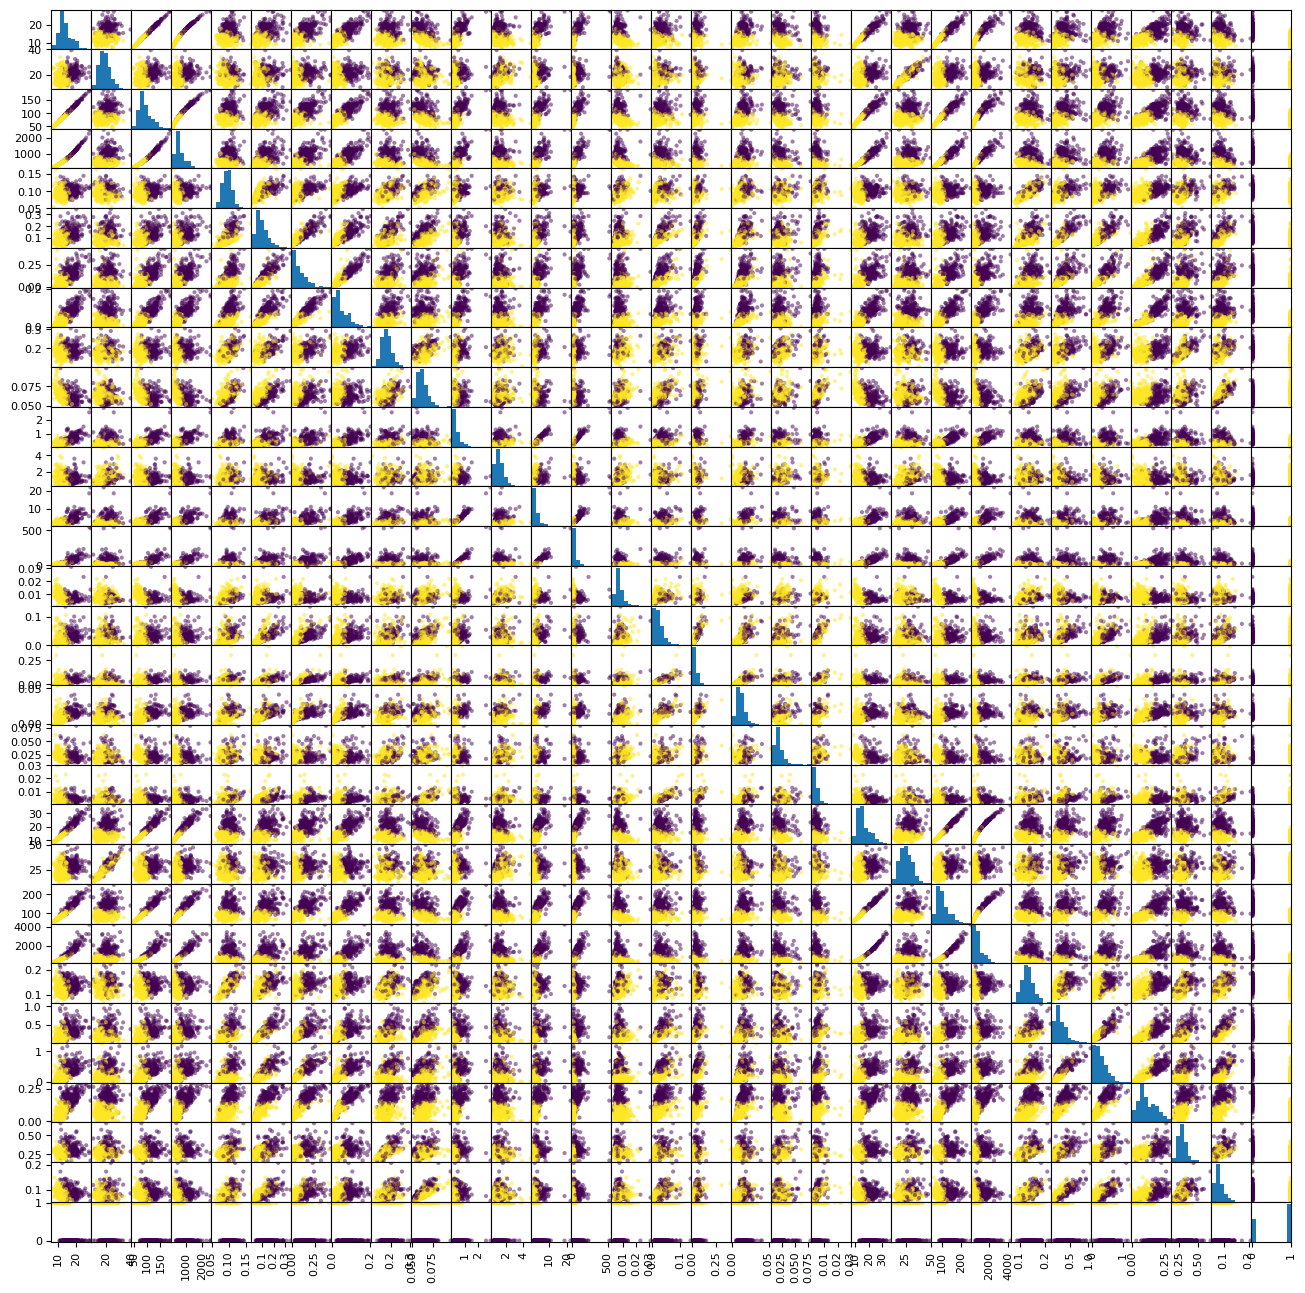

In [41]:
from pandas.plotting import scatter_matrix

scatter_matrix = scatter_matrix(data, c=target, figsize=(16, 16))
for ax in scatter_matrix.flatten():
    ax.set_xlabel('')
    ax.set_ylabel('')
plt.show()

## Mathod 2: Feature Importance Analysis
There are multiple approaches for feature importance analysis.

* __Lasso Regression:__
Lasso Regression (L1 regularization) provides feature importance by shrinking some coefficients to zero, effectively performing feature selection.

* __Random Forest Classifier:__
Random Forests provide feature importance scores based on how much each feature improves the model's performance.

* __Gradient Boosting:__
Gradient Boosting models can also provide feature importance scores.

__Note:__ All the data must be stored in a Pandas DataFrame format for plotting porpuses.

In [7]:
#Lasso Regresion
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(data, target)
lasso_df = pd.DataFrame({'Feature': data.columns, 'Importance': np.abs(lasso.coef_)}).sort_values(by='Importance', ascending=False)

#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(data, target)
rf_df = pd.DataFrame({'Feature': data.columns, 'Importance': model.feature_importances_}).sort_values(by='Importance', ascending=False)

#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=100, random_state=42)
model.fit(data, target)
gbc_df = pd.DataFrame({'Feature': data.columns, 'Importance': model.feature_importances_}).sort_values(by='Importance', ascending=False)

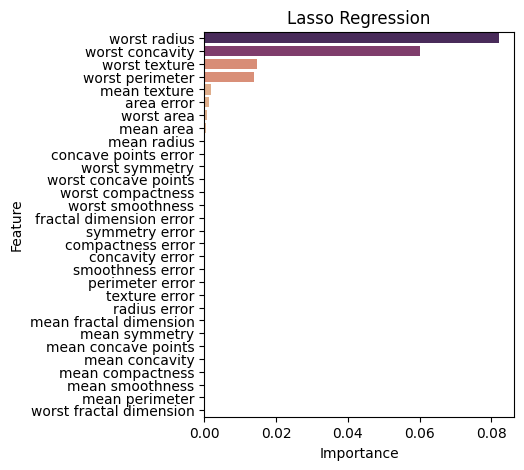

In [56]:
plt.figure(figsize=(4, 5))
sns.barplot(x='Importance', y='Feature', data=lasso_df, palette='flare', hue='Importance', legend=False)
plt.title('Lasso Regression')
plt.show()

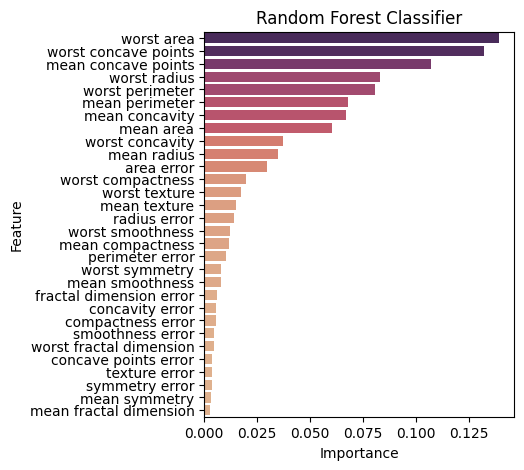

In [57]:
plt.figure(figsize=(4, 5))
sns.barplot(x='Importance', y='Feature', data=rf_df, palette='flare', hue='Importance', legend=False)
plt.title('Random Forest Classifier')
plt.show()

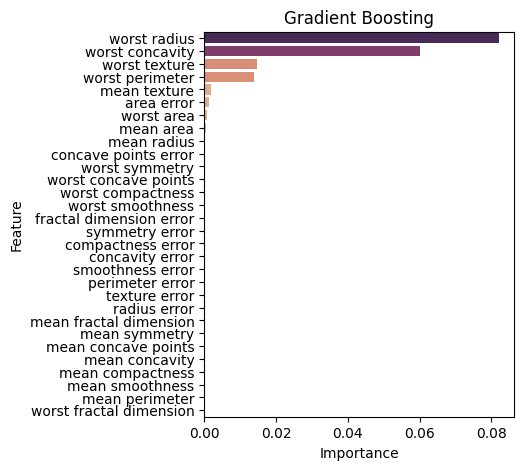

In [58]:
plt.figure(figsize=(4, 5))
sns.barplot(x='Importance', y='Feature', data=lasso_df, palette='flare', hue='Importance', legend=False)
plt.title('Gradient Boosting')
plt.show()

According to _Lasso Regression_ and _Gradient Boosting_, `worst_radius` and `worst_concavity` are the two top important features. They are ranked 4th and 9th respective per _Random Forest Classifier_. This method shows `worst_area` and `worst_concave_point` are the top two most important features.<br>
Let's plot the data point to getter a better sense of their distribution.

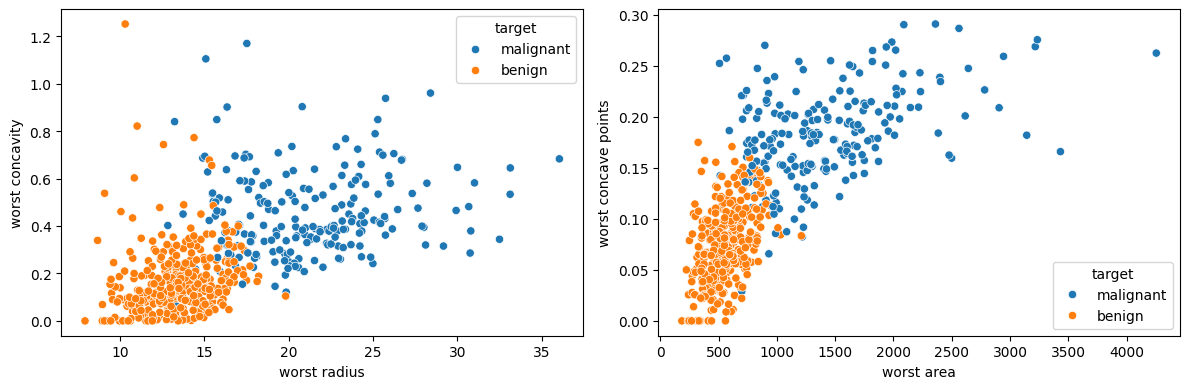

In [80]:
df1 = data[['worst radius', 'worst concavity']]
df2 = data[['worst area', 'worst concave points']]

sns.reset_defaults()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
sns.scatterplot(data=df1, x='worst radius', y='worst concavity', hue=target.map({0: 'malignant', 1: 'benign'}), ax=axes[0])
sns.scatterplot(data=df2, x='worst area', y='worst concave points', hue=target.map({0: 'malignant', 1: 'benign'}), ax=axes[1])

plt.tight_layout()
plt.show()

## Method 3: Mutual Information
__Mutual Information__ measures the dependency between two variables. In the context of feature selection, it helps quantify the amount of information obtained about one variable through another. High mutual information between a feature and the target variable indicates that the feature is a good predictor of the target.

In [11]:
from sklearn.feature_selection import mutual_info_classif

mi = mutual_info_classif(data, target) # np.array with the shape of (30,)

# Create a DataFrame for better visualization
mi_df = pd.DataFrame({'Feature': data.columns, 'Mutual Information': mi})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

print(mi_df)

                    Feature  Mutual Information
22          worst perimeter            0.472848
23               worst area            0.464456
20             worst radius            0.452826
7       mean concave points            0.440651
27     worst concave points            0.438070
2            mean perimeter            0.402716
6            mean concavity            0.373311
0               mean radius            0.371428
3                 mean area            0.360222
13               area error            0.341792
26          worst concavity            0.314000
12          perimeter error            0.277802
10             radius error            0.249176
25        worst compactness            0.225368
5          mean compactness            0.211823
17     concave points error            0.128315
21            worst texture            0.122246
16          concavity error            0.117708
1              mean texture            0.097717
24         worst smoothness            0

## Method 4: Recursive Feature Elimination (RFE)
__Recursive Feature Elimination (RFE)__ works by recursively removing the least important features and building the model with the remaining features. This process continues until the specified number of features is reached. It uses the model's coefficients or feature importances to determine which features to eliminate.

In [13]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression(max_iter=10000)

# Initialize RFE with the model and specify the number of features to select
rfe = RFE(estimator=model, n_features_to_select=2)

# Fit RFE
rfe.fit(data, target)

# Get the ranking of features
ranking = rfe.ranking_

# Create a DataFrame for better visualization
rfe_df = pd.DataFrame({'Feature': data.columns, 'Ranking': ranking})
rfe_df = rfe_df.sort_values(by='Ranking')

print(rfe_df)

                    Feature  Ranking
25        worst compactness        1
26          worst concavity        1
11            texture error        2
20             worst radius        3
0               mean radius        4
27     worst concave points        5
28           worst symmetry        6
6            mean concavity        7
5          mean compactness        8
24         worst smoothness        9
12          perimeter error       10
7       mean concave points       11
8             mean symmetry       12
21            worst texture       13
4           mean smoothness       14
1              mean texture       15
22          worst perimeter       16
13               area error       17
29  worst fractal dimension       18
10             radius error       19
15        compactness error       20
2            mean perimeter       21
9    mean fractal dimension       22
18           symmetry error       23
17     concave points error       24
16          concavity error       25
1

## Create training set

I create four datasets:

* `worst radius` and `worst concavity` dataset
* `worst area` and `worst concave point` dataset
* `worst perimeter` and `worst area` dataset (these two seems to be dependent featrures)
* `worst compactness` and `worst concavity` dataset

In [38]:
# Creat feature and target sets
X1 = data[['worst radius', 'worst concavity']].values # converts pandas.DataFram to numpy.ndarray
X2 = data[['worst area', 'worst concave points']].values
X3 = data[['worst perimeter', 'worst area']].values
X4 = data[['worst compactness', 'worst concavity']].values
y = target

In [9]:
print(type(X1), X1.shape)
print(type(y), y.shape)

<class 'numpy.ndarray'> (569, 2)
<class 'pandas.core.series.Series'> (569,)


## Train Models
I define and train 3 classifiers in this exercise:

* LinearSVC
* SVC with linear kernel
* SGDClassifier

The models are trained and studied separately for each pair of selected features.

In [148]:
# Define three different linear classifiers
def define_models(X, y, hyper_params):

    lsvc = lsvc = make_pipeline(StandardScaler(), LinearSVC(penalty=hyper_params['penalty_lsvc'], loss=hyper_params['loss_slvc'], C=hyper_params['C_lsvc'], max_iter=10_000, dual='auto', random_state=42))
    svc = make_pipeline(StandardScaler(), SVC(kernel='linear', C=hyper_params['C_svc'], random_state=42))
    sgdc = make_pipeline(StandardScaler(), SGDClassifier(alpha=hyper_params['alpha_sgdc'], random_state=42))

    lsvc.fit(X, y)
    svc.fit(X, y)
    sgdc.fit(X, y)

    return {'lsvc': lsvc, 'svc': svc, 'sgdc': sgdc}


The first set of linear models that I train are with `worst radius` and `worst concavity`. I fine tune the hyperparameters to have the models to produce almost the same decision boundary.<br>
Note that `C` parameter in SVM models and `alpha` in SGD model have regularization effect.

In [149]:
hyper_params_1 = {'C_lsvc': 1, 'penalty_lsvc':'l2', 'loss_slvc':'squared_hinge', 'C_svc': 0.06, 'alpha_sgdc': 0.03}
clfs_1 = define_models(X1, y, hyper_params_1)

For evaluation of the models I use the following scores:

* Accuracy
* Percision
* Recall
* F1-score
* Confusion matrix

Let's define a helper function for evaluation.

In [55]:
def evaluate_models(clfs, X, y):

    df = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Coefficients', 'Intercept'], index=clfs.keys())
    conf_matrix = {}
    class_report = {}
    for clf_name, clf_model in clfs.items():
        y_pred = clf_model.predict(X)
        df.loc[clf_name] = [
            accuracy_score(y, y_pred),
            precision_score(y, y_pred, average='binary'),
            recall_score(y, y_pred, average='binary'),
            f1_score(y, y_pred, average='binary'),
            clf_model.steps[1][1].coef_[0],
            clf_model.steps[1][1].intercept_[0]]

        conf_matrix[clf_name] = confusion_matrix(y, y_pred)
        class_report[clf_name] = classification_report(y, y_pred)

    return df, conf_matrix, class_report



def print_evaluation_scores(clfs, X, y):
    scores, conf_matrix, class_report = evaluate_models(clfs, X, y)
    print(f"Performance scores:\n{scores}", end="\n\n")
    for name, matrix in conf_matrix.items():
      print(f"Confusion matrix for {name}:\n{matrix}")
    print("\n")
    for name, report in class_report.items():
      print(f"Classification report for {name}:\n{report}")


In [150]:
print_evaluation_scores(clfs_1, X1, y)

Performance scores:
      Accuracy Precision    Recall  F1 Score  \
lsvc  0.942004  0.952514  0.955182  0.953846   
svc   0.943761  0.950139  0.960784  0.955432   
sgdc  0.945518  0.950276  0.963585  0.956885   

                                    Coefficients Intercept  
lsvc  [-1.5817340764689074, -0.5205480824600222]   0.22259  
svc   [-1.5512552322270807, -0.6924524773218063]  0.339721  
sgdc  [-1.5335990319762052, -0.7025383794204821]   0.36014  

Confusion matrix for lsvc:
[[195  17]
 [ 16 341]]
Confusion matrix for svc:
[[194  18]
 [ 14 343]]
Confusion matrix for sgdc:
[[194  18]
 [ 13 344]]


Classification report for lsvc:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       212
           1       0.95      0.96      0.95       357

    accuracy                           0.94       569
   macro avg       0.94      0.94      0.94       569
weighted avg       0.94      0.94      0.94       569

Classification report for svc:
 

Above, you see the comparison of three linear classifiers trained on `worst radius` and `worst concavity` dataset. The hyperparameters for these models are selected to obtain similar accuracy. The scores for all models are almost the same and the model parameters (coefficient and intercept) are so close.

In [59]:
def plot_datapoints(X, y, ax):
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y.map({0: 'malignant', 1: 'benign'}), ax=ax)

def get_unscaled_params(svm_clf):
    scaler = svm_clf.named_steps['standardscaler']
    classifier= svm_clf.steps[1][1] # another way to access classifier is to use .steps with indices

    # Scaled coefficients and intercept
    w_s = classifier.coef_[0]
    b_s = classifier.intercept_[0]

    # Unscaled coefficients and intercept
    w = w_s / scaler.scale_
    b = classifier.decision_function([-scaler.mean_ / scaler.scale_])

    return w, b


def plot_linearsvc_decision_boundary(X, ax, clf, scaled=True):
    x0 = np.linspace(X[:, 0].min() - 0.2, X[:, 0].max() + 0.2, 200)
    if scaled:
        x1 = clf.steps[1][1].decision_function(np.c_[x0, np.zeros_like(x0)])
    else:
        w, b = get_unscaled_params(clf)
        x1 = -(w[0] / w[1]) * x0 - b / w[1]

    sns.lineplot(x=x0, y=x1, ax=ax, color='k', linewidth=2, zorder=-2)


def plot_svc_decision_boundary(X, ax, clf, scaled=True):
    x0 = np.linspace(X[:, 0].min() - 0.2, X[:, 0].max() + 0.2, 200)
    if scaled:
        x1 = clf.steps[1][1].decision_function(np.c_[x0, np.zeros_like(x0)])
    else:
        w, b = get_unscaled_params(clf)
        x1 = -(w[0] / w[1]) * x0 - b / w[1]
    sns.lineplot(x=x0, y=x1, ax=ax, color='k', linewidth=2, zorder=-2)


def plot_sgd_decision_boundary(X, ax, clf):
    x0 = np.linspace(X[:, 0].min() - 0.2, X[:, 0].max() + 0.2, 200)
    x1 = clf.steps[1][1].decision_function(np.c_[x0, np.zeros_like(x0)])
    sns.lineplot(x=x0, y=x1, ax=ax, color='k', linewidth=2, zorder=-2)



def plot_decision_boundary(X, ax, clf):
    match clf.steps[1][0]:
        case 'linearsvc':
            plot_linearsvc_decision_boundary(X, ax, clf)
        case 'svc':
            plot_svc_decision_boundary(X, ax, clf)
        case 'sgdclassifier':
            plot_sgd_decision_boundary(X, ax, clf)
        case _:
            pass
    ax.set_xlim(X[:, 0].min() - 0.2, X[:, 0].max() + 0.2)
    ax.set_ylim(X[:, 1].min() - 0.2, X[:, 1].max() + 0.2)


def decorate(ax, clf, xlabel, ylabel):
    #xlabel, ylabel = 'worst area', 'worst concave points'
    ax.set_xlabel(xlabel, fontsize=10)
    ax.set_ylabel(ylabel, fontsize=10)
    ax.set_title(f"{clf.steps[1][0]}, w: [{clf.steps[1][1].coef_[0][0]:.2f},{clf.steps[1][1].coef_[0][1]:.2f}], b:{clf.steps[1][1].intercept_[0]:.2f}", fontsize=12)
    ax.grid()


def plot_models(X, y, clfs, xlabel, ylabel):
    # Scale the features for plot because the coef_ and intercept_ are fitted to the scaled features
    X_scaled = StandardScaler().fit_transform(X)

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
    for ax, clf_name in zip(axes, clfs.keys()):
        plot_datapoints(X_scaled, y, ax)
        plot_decision_boundary(X_scaled, ax, clfs[clf_name])
        decorate(ax, clfs[clf_name], xlabel, ylabel)
    plt.tight_layout()
    plt.show()

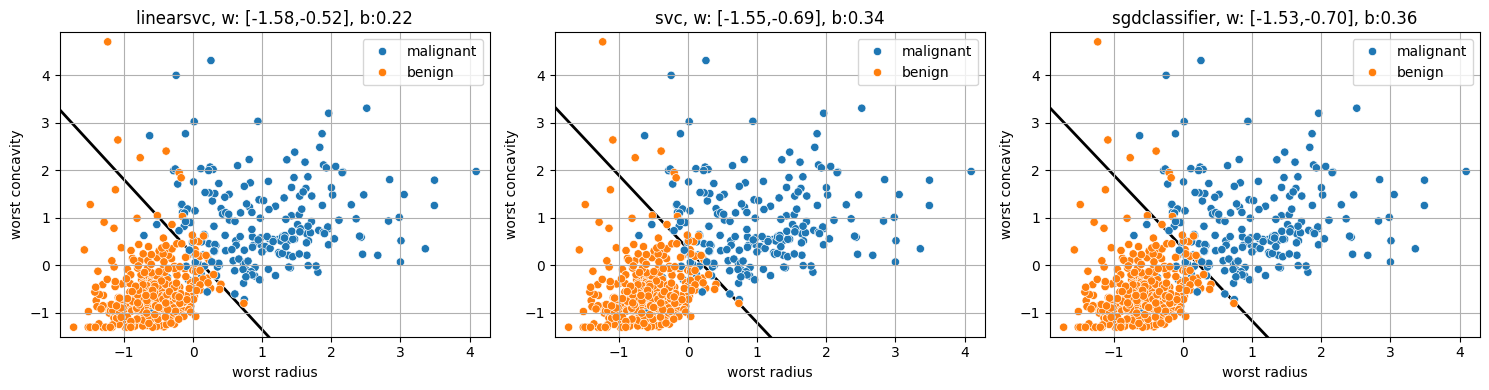

In [151]:
plot_models(X1, y, clfs_1, xlabel='worst radius', ylabel='worst concavity')

## Dataset 2
Features: `worst area` and `worst concave point`

In [152]:
# Train models
hyper_params_2 = {'C_lsvc': 1, 'penalty_lsvc':'l2', 'loss_slvc':'squared_hinge', 'C_svc': 0.1, 'alpha_sgdc': 0.017}
clfs_2 = define_models(X2, y, hyper_params_2)

In [153]:
# Evaluate models
print_evaluation_scores(clfs_2, X2, y)

Performance scores:
      Accuracy Precision    Recall  F1 Score  \
lsvc  0.957821  0.969014  0.963585  0.966292   
svc   0.954306  0.948509  0.980392  0.964187   
sgdc  0.950791  0.943396  0.980392  0.961538   

                                    Coefficients Intercept  
lsvc  [-1.5658171346627623, -0.8731111056080841]  0.099215  
svc      [-1.520137437818985, -1.13084893461047]  0.284259  
sgdc  [-1.5661506017661437, -1.1278765796421701]   0.31019  

Confusion matrix for lsvc:
[[201  11]
 [ 13 344]]
Confusion matrix for svc:
[[193  19]
 [  7 350]]
Confusion matrix for sgdc:
[[191  21]
 [  7 350]]


Classification report for lsvc:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       212
           1       0.97      0.96      0.97       357

    accuracy                           0.96       569
   macro avg       0.95      0.96      0.95       569
weighted avg       0.96      0.96      0.96       569

Classification report for svc:
 

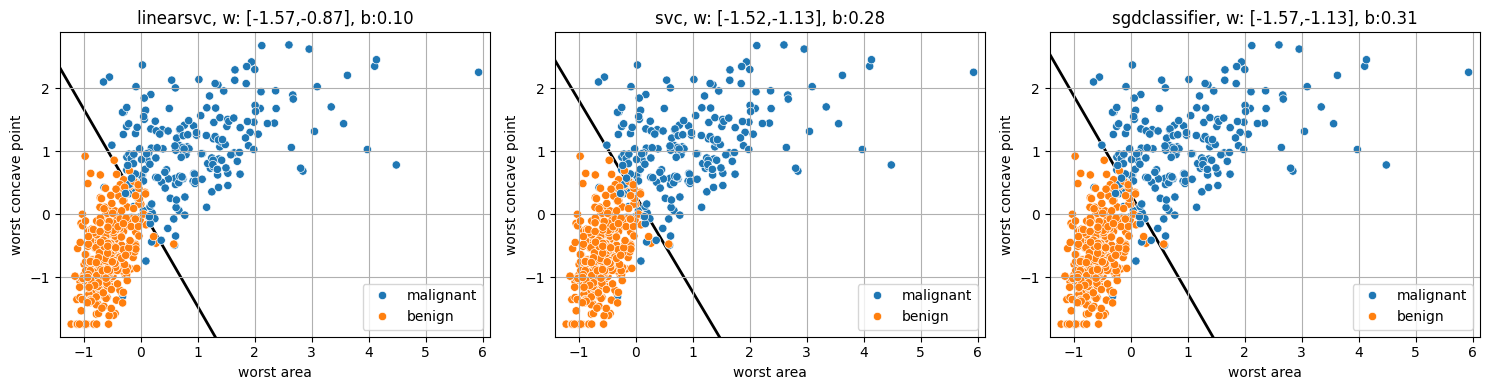

In [154]:
plot_models(X2, y, clfs_2, xlabel='worst area', ylabel='worst concave point')

## Dataset 3
Features: `worst perimeter` and `worst area`

In [155]:
# Train models
hyper_params_3 = {'C_lsvc': 0.35, 'penalty_lsvc':'l2', 'loss_slvc':'squared_hinge', 'C_svc': 0.1, 'alpha_sgdc': 0.017}
clfs_3 = define_models(X3, y, hyper_params_3)

In [156]:
# Evaluate models
print_evaluation_scores(clfs_3, X3, y)

Performance scores:
      Accuracy Precision    Recall  F1 Score  \
lsvc  0.917399  0.921196   0.94958  0.935172   
svc   0.922671  0.904393  0.980392   0.94086   
sgdc  0.919156  0.899743  0.980392  0.938338   

                                    Coefficients Intercept  
lsvc  [-1.5240387984093855, -0.2265132306431761]  0.132479  
svc   [-1.5296998612166104, -0.9877876187375357]  0.266257  
sgdc  [-1.5319488023992085, -0.9982270235766029]    0.3012  

Confusion matrix for lsvc:
[[183  29]
 [ 18 339]]
Confusion matrix for svc:
[[175  37]
 [  7 350]]
Confusion matrix for sgdc:
[[173  39]
 [  7 350]]


Classification report for lsvc:
              precision    recall  f1-score   support

           0       0.91      0.86      0.89       212
           1       0.92      0.95      0.94       357

    accuracy                           0.92       569
   macro avg       0.92      0.91      0.91       569
weighted avg       0.92      0.92      0.92       569

Classification report for svc:
 

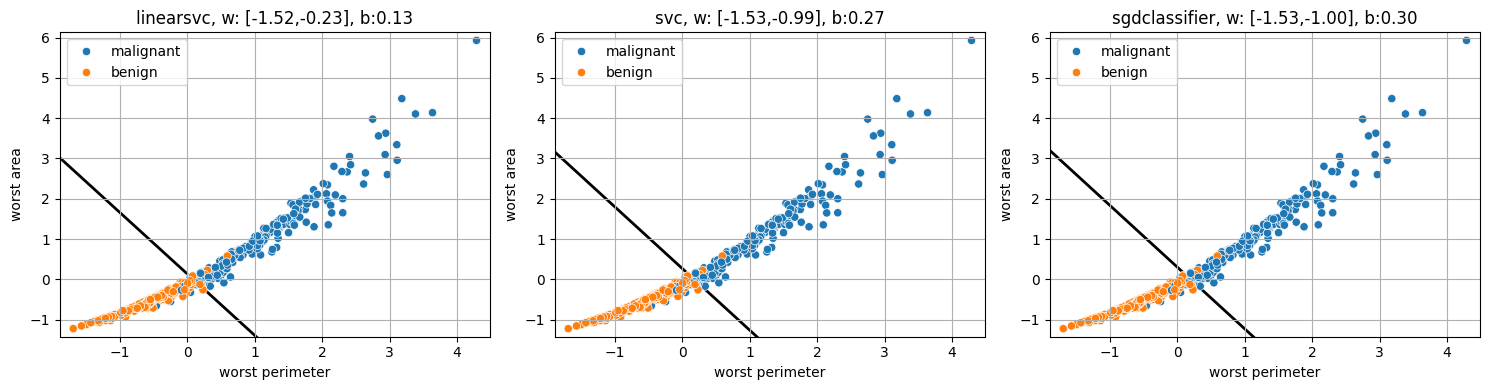

In [157]:
plot_models(X3, y, clfs_3, xlabel='worst perimeter', ylabel='worst area')

## Dataset 4
Feature: `worst compactness` and `worst concavity`

In [166]:
# Train models
hyper_params_4 = {'C_lsvc': 0.007, 'penalty_lsvc':'l2', 'loss_slvc':'hinge', 'C_svc': 0.01, 'alpha_sgdc': 0.25}
clfs_4 = define_models(X4, y, hyper_params_4)

In [167]:
# Evaluate models
print_evaluation_scores(clfs_4, X4, y)

Performance scores:
      Accuracy Precision    Recall  F1 Score  \
lsvc  0.834798  0.841558  0.907563  0.873315   
svc   0.822496  0.818408  0.921569   0.86693   
sgdc  0.818981  0.805288  0.938375  0.866753   

                                    Coefficients Intercept  
lsvc  [-0.4427027368108572, -0.6620543657538028]   0.31263  
svc   [-0.4429100661961189, -0.7072746183027215]  0.404135  
sgdc  [-0.4049322763027574, -0.6245817665708704]  0.445505  

Confusion matrix for lsvc:
[[151  61]
 [ 33 324]]
Confusion matrix for svc:
[[139  73]
 [ 28 329]]
Confusion matrix for sgdc:
[[131  81]
 [ 22 335]]


Classification report for lsvc:
              precision    recall  f1-score   support

           0       0.82      0.71      0.76       212
           1       0.84      0.91      0.87       357

    accuracy                           0.83       569
   macro avg       0.83      0.81      0.82       569
weighted avg       0.83      0.83      0.83       569

Classification report for svc:
 

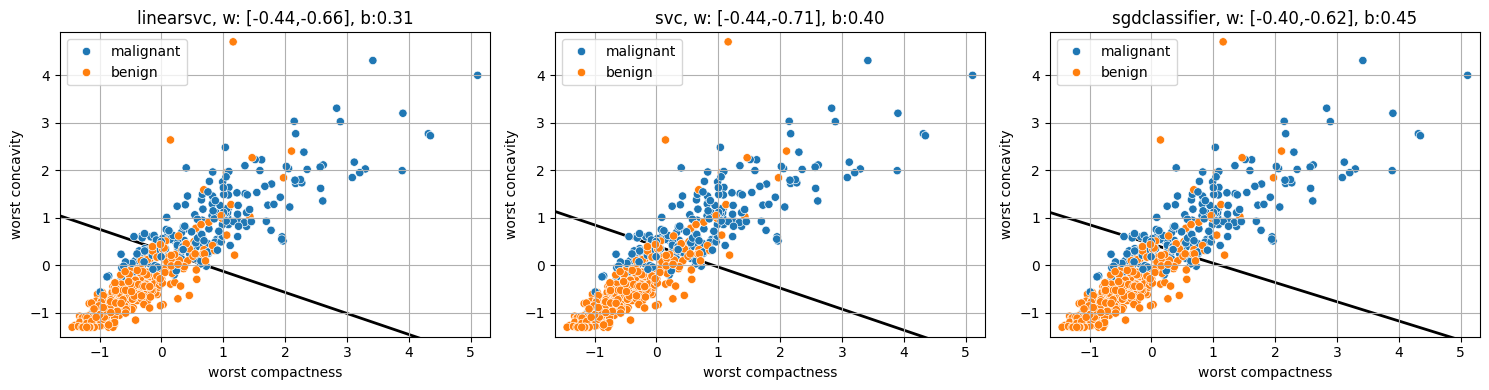

In [168]:
plot_models(X4, y, clfs_4, xlabel='worst compactness', ylabel='worst concavity')